# LSTM(Long Short-Term Memory) 구조

<img src = "./image/rnn_lstm.jpg">

- 단기 기억을 오래 기억하기 위해 고안되었음

<img src = "./image/lstm.png">

- 은닉 상태를 만드는 방법
    - output gate layer(출력 게이트)
        1. 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉상태를 만듦
            - 이 때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용
        2. tanh 활성화 함수를 통과한 값과 곱해져서 은닉 상태를 만듦
        
- LSTM 은 순환 되는 상태가 2개
    - 은닉 상태
    - 셀 상태(cell state)
        - 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값
        
- 셀 상태를 계산하는 과정
    - forget gate layer(삭제 게이트)
        - 정보를 제거하는 역할
        1. 입력과 은닉 상태를 또 다른 가중치에 곱한 다음 시그모이드 함수를 통과
        2. 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만듦
            - 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여
    
    - input gate layer(입력 게이트)
        - 새로운 정보를 셀 상태에 추가
        1. 입력과 은닉 상태를 각기 다른 가중치에 곱함
        2. 하나는 시그모이드 함수, 하나는 tanh 함수를 통과
        3. 두 결과를 곱함
        4. 이전 셀 상태와 더함

## 데이터 준비

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#  데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=500)

In [3]:
# 훈련 세트와 검증 세트로 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                 random_state = 12)

In [4]:
# 패딩
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen = 100)

In [7]:
# LSTM 모델 생성
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 32, input_shape = (100,)))
model.add(keras.layers.LSTM(8)) # 유닛 수 
model.add(keras.layers.Dense(1, activation='sigmoid')) # 출력층

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           16000     
                                                                 
 lstm (LSTM)                 (None, 8)                 1312      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 17321 (67.66 KB)
Trainable params: 17321 (67.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- LSTM 셀 파라미터 개수
    - ((유닛 수 * 유닛 수) + (입력값의 수 * 유닛 수) + 유닛 수) * 4 
    - ((8 * 8) + (32 * 8) + 8) * 4 = 1312

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-lstm-model.h5",
                                               save_best_only= True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

In [11]:
history = model.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data= (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100


313/313 [==============================] - 9s 23ms/step - loss: 0.6917 - accuracy: 0.5399 - val_loss: 0.6903 - val_accuracy: 0.5786
Epoch 2/100
  7/313 [..............................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5312

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 7s 22ms/step - loss: 0.6878 - accuracy: 0.6090 - val_loss: 0.6848 - val_accuracy: 0.6116
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6776 - accuracy: 0.6484 - val_loss: 0.6681 - val_accuracy: 0.6796
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6401 - accuracy: 0.7074 - val_loss: 0.6066 - val_accuracy: 0.7216
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5851 - accuracy: 0.7285 - val_loss: 0.5785 - val_accuracy: 0.7240
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5599 - accuracy: 0.7467 - val_loss: 0.5587 - val_accuracy: 0.7382
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5398 - accuracy: 0.7577 - val_loss: 0.5390 - val_accuracy: 0.7518
Epoch 8/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5215 - accuracy: 0.7701 - val_loss: 0.5229 - val_accuracy: 0.7590
Epoc

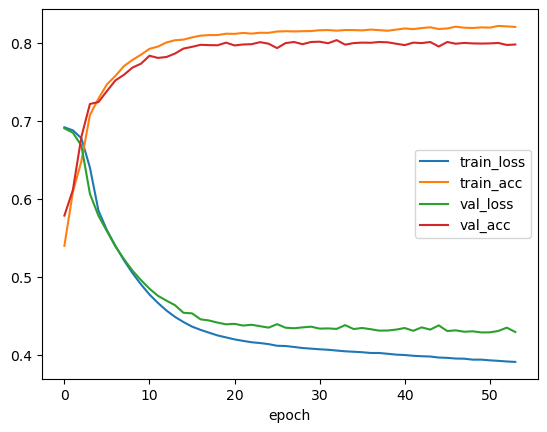

In [12]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")


plt.legend()
plt.xlabel("epoch")
plt.show()

# 순환층에 드롭아웃 적용

- 순환층은 자체적으로 드롭아웃 기능을 제공
    - SimpleRNN 과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있음
        - dropout : 셀의 입력에 드롭아웃을 적용
        - recurrent_dropout : 순환되는 은닉 상태에 드롭아웃을 적용
            - 버전에 따라 recurrent_dropout 이 GPU를 사용하지 못하는 경우가 있음

In [15]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 32, input_shape = (100,)))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-dropout-model.h5",
                                               save_best_only= True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

In [17]:
history = model2.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data= (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 24ms/step - loss: 0.6924 - accuracy: 0.5279 - val_loss: 0.6916 - val_accuracy: 0.5458
Epoch 2/100
  7/313 [..............................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5268

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 7s 23ms/step - loss: 0.6902 - accuracy: 0.5648 - val_loss: 0.6883 - val_accuracy: 0.6074
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6829 - accuracy: 0.6297 - val_loss: 0.6733 - val_accuracy: 0.6580
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6421 - accuracy: 0.6880 - val_loss: 0.6194 - val_accuracy: 0.6926
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6052 - accuracy: 0.7100 - val_loss: 0.5982 - val_accuracy: 0.7066
Epoch 6/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5830 - accuracy: 0.7288 - val_loss: 0.5773 - val_accuracy: 0.7330
Epoch 7/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5622 - accuracy: 0.7469 - val_loss: 0.5574 - val_accuracy: 0.7462
Epoch 8/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5440 - accuracy: 0.7590 - val_loss: 0.5402 - val_accuracy: 0.7582
Epoc

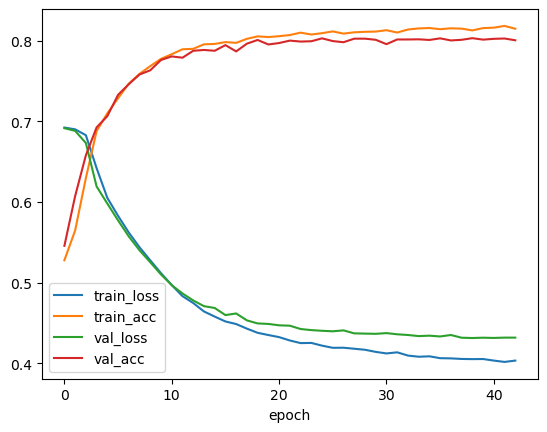

In [18]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")


plt.legend()
plt.xlabel("epoch")
plt.show()

# 2개의 층을 연결

- 순환층을 연결할 때의 주의점
    - 순환 층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달
        - 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함
        - 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야함
            - return_sequences 매개변수를 True로 지정

In [19]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 32, input_shape = (100,)))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = "sigmoid"))

In [20]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           16000     
                                                                 
 lstm_3 (LSTM)               (None, 100, 8)            1312      
                                                                 
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17865 (69.79 KB)
Trainable params: 17865 (69.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 첫 번째 LSTM 
    - 모든 타임스텝(100개) 의 은닉상태를 출력하기 때문에 출력의 크기가 (None, 100, 8)
- 두 번째 LSTM
    - 마지막 타임스텝의 은닉 상태만 출력하기 때문에 출력의 크기가 (None, 8)
    

In [21]:
((32 * 8) + (8 * 8) + 8) * 4

1312

In [22]:
((8 * 8) + (8 * 8) + 8) * 4

544

- 파라미터 계산

In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-2rnn-model.h5",
                                               save_best_only= True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

In [24]:
history = model3.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data= (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 49ms/step - loss: 0.6930 - accuracy: 0.5148 - val_loss: 0.6930 - val_accuracy: 0.4976
Epoch 2/100
  4/313 [..............................] - ETA: 12s - loss: 0.6929 - accuracy: 0.5078

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 14s 44ms/step - loss: 0.6927 - accuracy: 0.5346 - val_loss: 0.6926 - val_accuracy: 0.4998
Epoch 3/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6921 - accuracy: 0.5215 - val_loss: 0.6914 - val_accuracy: 0.5302
Epoch 4/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6895 - accuracy: 0.5556 - val_loss: 0.6867 - val_accuracy: 0.6080
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6780 - accuracy: 0.6194 - val_loss: 0.6635 - val_accuracy: 0.6552
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6301 - accuracy: 0.6793 - val_loss: 0.5995 - val_accuracy: 0.7016
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5806 - accuracy: 0.7179 - val_loss: 0.5725 - val_accuracy: 0.7242
Epoch 8/100
313/313 [==============================] - 14s 43ms/step - loss: 0.5554 - accuracy: 0.7330 - val_loss: 0.5511 - val_accuracy: 0.73

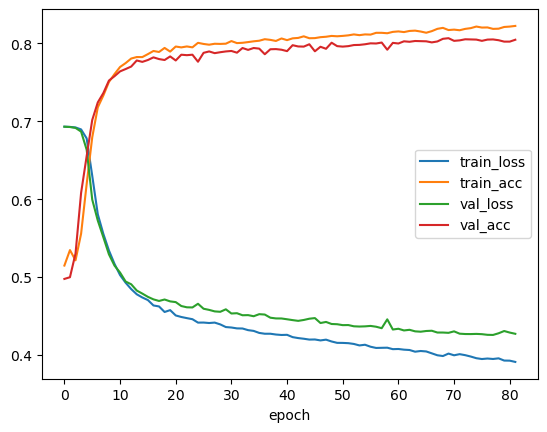

In [25]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")


plt.legend()
plt.xlabel("epoch")
plt.show()

# GRU(Grated Recurrent Unit) 구조

<img src = "./image/rnn_lstm_gru.png">

- LSTM을 간소화한 버전
- LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함
- LSTM보다 가중치가 적기 때문에 계산량이 적지만 성능은 LSTM과 유사함  
    - 데이터 양이 적을 때는 GPU의 성능이 더 좋고 데이터 양이 많을 때는 LSTM의 성능이 더 좋아지는 경향이 있음 
    - GRU와 LSTM 중 어떤 것이 낫다 라고 말할 수는 없음

<img src = "./image/gru.png">

- GRU 셀이는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀 3개가 들어 있음
    - 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용
    
- reset_gate
    - 셀의 출력이 은닉 상태에 바로 곱해져서 삭제 게이트 역할을 수행 
    
- update_gate 
    - 어떤 정보를 얼마만큼 유지하고 어떤 정보를 추가할지 결정하는 역할

In [5]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 32, input_shape = (100,)))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [6]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           16000     
                                                                 
 gru (GRU)                   (None, 8)                 1008      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 17017 (66.47 KB)
Trainable params: 17017 (66.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
((32 * 8) + (8 * 8) + 8 + 8) * 3

1008

- '+ 8' 을 하는건 유닛수만큼 한 번 더 더해줘야함

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-gru-model.h5",
                                               save_best_only= True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

In [10]:
history = model4.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                   validation_data= (val_seq, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100


313/313 [==============================] - 12s 29ms/step - loss: 0.6925 - accuracy: 0.5232 - val_loss: 0.6919 - val_accuracy: 0.5322
Epoch 2/100
  6/313 [..............................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5521

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 8s 25ms/step - loss: 0.6913 - accuracy: 0.5491 - val_loss: 0.6905 - val_accuracy: 0.5656
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6894 - accuracy: 0.5753 - val_loss: 0.6884 - val_accuracy: 0.5780
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6865 - accuracy: 0.5867 - val_loss: 0.6850 - val_accuracy: 0.5854
Epoch 5/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6820 - accuracy: 0.5950 - val_loss: 0.6796 - val_accuracy: 0.5962
Epoch 6/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6749 - accuracy: 0.6087 - val_loss: 0.6712 - val_accuracy: 0.6084
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6637 - accuracy: 0.6228 - val_loss: 0.6580 - val_accuracy: 0.6232
Epoch 8/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6468 - accuracy: 0.6411 - val_loss: 0.6373 - val_accuracy: 0.6506
Epoc

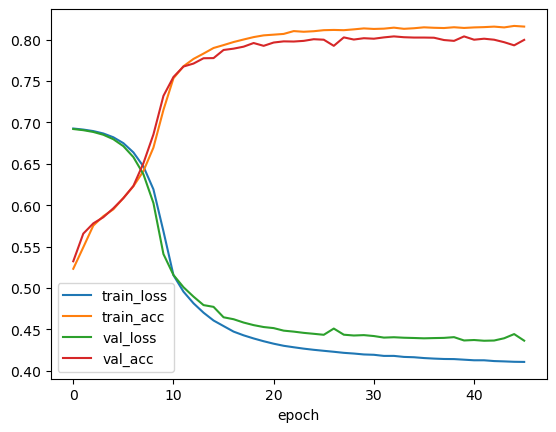

In [11]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")


plt.legend()
plt.xlabel("epoch")
plt.show()

# best model 검증

In [12]:
test_seq = pad_sequences(x_test, maxlen = 100)
rnn_model = keras.models.load_model("./model/best-dropout-model.h5")
rnn_model.evaluate(test_seq, y_test)

782/782 [==============================] - 5s 5ms/step - loss: 0.4216 - accuracy: 0.8065


[0.4215927720069885, 0.8065199851989746]